In [17]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 16
import numpy
from math import sqrt
import math
import random

So far we have looked at _unbiased_ random walks, in which we have equal probability to move forward and backward. Sometimes instead we have a _biased_ random walk, where we are more likely to move in one direction than another.

Let's consider a one-dimensional random walk, in which at each step there is a probability $p$ of moving in the positive direction (and therefore a probability $1-p$ of moving in the negative direction).

Mean is 7.99668
Standard deviation is 6.175699877552342


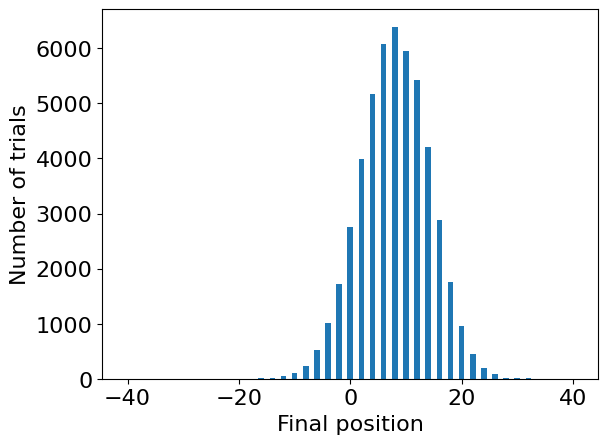

In [18]:
# 1 dimensional biased random walk, sampled multiple times
P = 0.6 # probability p of positive motion
NSTEPS = 40 # number of steps in random walk
NSAMPLES = 50000 # number of random walks to sample
# now we don't care about the itermediate positions; we just want to store a list of final positions
final_positions = []
for sample in range(NSAMPLES):
    # reset to zero
    position = 0
    for step in range(NSTEPS):
        # we use += which means "add the following to the existing variable"
        if random.random() < P:
            position += 1
        else:
            position += -1
    # now we should know where we wound up
    final_positions.append(position)

print('Mean is', numpy.mean(final_positions))
print('Standard deviation is', numpy.std(final_positions))
    
# let's make a histogram with 81 bins between -40.5 and 40.5 (keeps the bin edges integral)
plt.hist(final_positions, range=(-40.5,40.5), bins=81)
plt.xlabel('Final position')
plt.ylabel('Number of trials')
plt.show()

By changing $p$ to a few values, verify that:
* the mean position at the end of the random walks is $2N(p-1/2)$;
* the standard deviation of the final positions is $2\sqrt{Np(1-p)}$.

Since you're sampling from the full ensemble, there's some randomness in the number you'll get from the simulations, so don't worry if it's slightly different from the formula prediction.

In [22]:
def walk(NSTEPS = 40,
    NSAMPLES = 50000,
    P = 0.6 ):
    # probability p of positive motion
     # number of random walks to sample
    # now we don't care about the itermediate positions; we just want to store a list of final positions
    final_positions = []
    for sample in range(NSAMPLES):
        # reset to zero
        position = 0
        for step in range(NSTEPS):
            # we use += which means "add the following to the existing variable"
            if random.random() < P:
                position += 1
            else:
                position += -1
        # now we should know where we wound up
        final_positions.append(position)
    return final_positions

# to verify, we need to show that the mean goes by N*P, and the standard deviation by sqrt(N*P*(1-P))
# we can make a pandas table with a p value, an N value, and the mean and standard deviation of the final positions
import pandas
data = []
for P in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    for NSTEPS in [10, 20, 30, 40, 50]:
        final_positions = walk(NSTEPS=NSTEPS, P=P)
        data.append({'P': P, 'N': NSTEPS, 'Actual Mean': numpy.mean(final_positions), 'Actual std': numpy.std(final_positions),
                     'Expected Mean': 2*NSTEPS*(P-.5), 'Expected std': 2*sqrt(NSTEPS*P*(1-P))})
df = pandas.DataFrame(data)
df

,P,N,Actual Mean,Actual std,Expected Mean,Expected std
0,0.1,10,-7.98508,1.903727,-8.0,1.897367
1,0.1,20,-15.99440,2.689708,-16.0,2.683282
2,0.1,30,-23.99084,3.281316,-24.0,3.286335
3,0.1,40,-32.00756,3.794040,-32.0,3.794733
4,0.1,50,-39.99144,4.241557,-40.0,4.242641
5,0.2,10,-6.00280,2.526118,-6.0,2.529822
6,0.2,20,-11.99924,3.596921,-12.0,3.577709
7,0.2,30,-17.98896,4.397240,-18.0,4.381780
8,0.2,40,-24.02124,5.045880,-24.0,5.059644
9,0.2,50,-30.00236,5.638035,-30.0,5.656854
